### CE007 : Lab 4 - Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 80%-20%

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from subprocess import call

In [48]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
ds_wine = datasets.load_wine()
ds = pd.DataFrame(ds_wine.data, columns = ds_wine.feature_names)
print("No. of examples and features in the dataset are:", ds.shape)
ds.head()

No. of examples and features in the dataset are: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
#ds.info()
#ds.describe()

Printing the names of features and label types of digits

In [51]:
print("Features are as follows:\n", ds_wine.feature_names)
print("\nLabels:\n", np.unique(ds_wine.target_names))

Features are as follows:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Labels:
 ['class_0' 'class_1' 'class_2']


**Splitting the dataset into the training and testing dataset. (Roll no: 7)
  => Set Random state of model equals to your roll number**

In [52]:
training_data, testing_data, training_target, testing_target = train_test_split(ds_wine.data, ds_wine.target, test_size = 0.20, random_state = 7)

Creating an instance of classifier and fitting the model.

In [53]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 7)
dtc.fit(training_data,training_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Testing the model and getting accuracy score, confusion matrix, precision score and recall score

In [54]:
# Testing
prediction_target = dtc.predict(testing_data)

# Getting Accuracy
accuracy = accuracy_score(testing_target, prediction_target)
print("Accuracy Score:\n", accuracy)

# Getting Confusion Matrix
cm = confusion_matrix(testing_target, prediction_target)
print("\nConfusion Matrix:\n",cm)

# Getting Precision
precision = precision_score(testing_target, prediction_target, average=None)
print("\nPrecision Score:\n", precision)

# Getting Recall
recall = recall_score(testing_target, prediction_target, average=None)
print("\nRecall Score:\n", recall)

Accuracy Score:
 0.9444444444444444

Confusion Matrix:
 [[ 7  0  0]
 [ 1 16  0]
 [ 0  1 11]]

Precision Score:
 [0.875      0.94117647 1.        ]

Recall Score:
 [1.         0.94117647 0.91666667]


In [55]:
export_graphviz(dtc, out_file='wine_tree.dot',
                feature_names=list(ds_wine.feature_names),
               class_names=list(ds_wine.target_names),
                filled=True)

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])

0

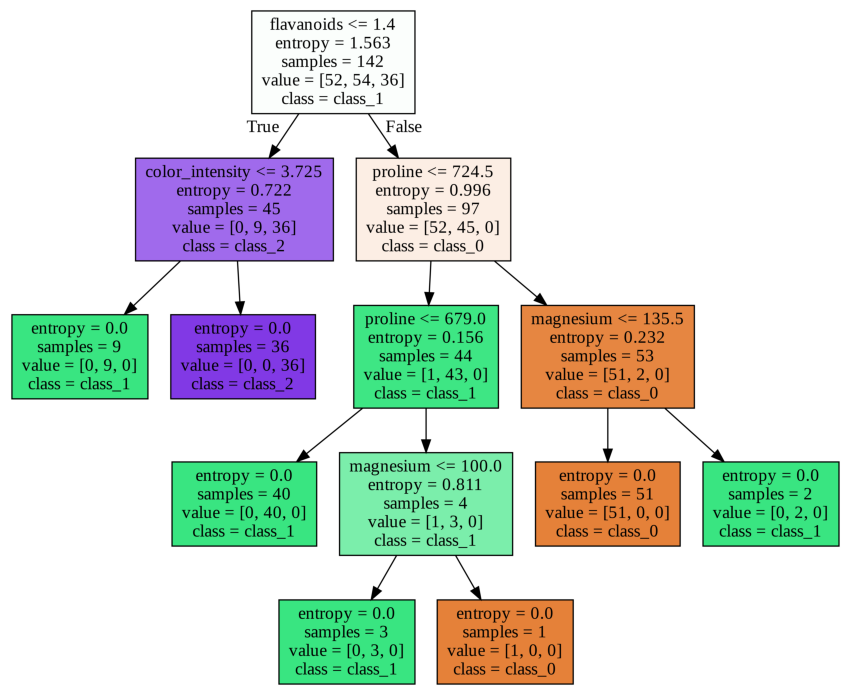

In [56]:
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()